In [2]:
import numpy as np
import matplotlib.pyplot as plt
from casadi import *
import process_model_lib as plib
import function_lib as fn

Ts = 1/30
sys,F = plib.quadcopter(Ts)

xm = 0*np.ones((12,1))
target = vertcat(30,20,10)
u_in = vertcat(10,10,10,10)

lbx = -100*np.ones((12,1))
ubx = 100*np.ones((12,1))
dx0 = 0*np.ones((12,1))

lbu = -100*np.ones((4,1))
ubu = 100*np.ones((4,1))
u0 = vertcat(9.81*1.846,0*np.ones((3,1)))
par = {'lbx':lbx,'ubx':ubx,'dx0':dx0,'lbu':lbu,'ubu':ubu,'u0':u0}

OCP, trajectories = fn.buildNLP(sys,par,N=20,tf=Ts)

x = []
y = []
z = []

solver = OCP['solver']

xm = fn.solveODE(sys,u_in,target) 
sol,flag = fn.SS_opt(sys,target)
xoptSS = sol['x'].full()

for i in range(0,20):
    sol = solver(x0  = OCP['x0'],
                lbx = OCP['lbx'],
                ubx = OCP['ubx'],
                lbg = OCP['lbg'],
                ubg = OCP['ubg'],
                p = vertcat(xm,u_in,target))
    
    assert solver.stats()['return_status']=='Solve_Succeeded', solver.stats()['return_status'] 

    # Extract the optimal solutions
    [wopt, uopt] = trajectories(sol['x'])
    xopt = wopt[3,:].full().reshape(-1,1)
    yopt = wopt[4,:].full().reshape(-1,1)
    zopt = wopt[5,:].full().reshape(-1,1)
    frce = uopt[0,:].full().reshape(-1,1)
    tauR = uopt[1,:].full().reshape(-1,1)
    tauP = uopt[2,:].full().reshape(-1,1)
    tauY = uopt[3,:].full().reshape(-1,1)

    # extract first control action
    u_in = vertcat(frce[0],tauR[0],tauP[0],tauY[0])

    Fk = F(x0=xm,p=vertcat(u_in,target))
    xm =  Fk['xf']
    x.append(xm[3])
    y.append(xm[4])
    z.append(xm[5])



AssertionError: Restoration_Failed

[10, 10, 10, 10]


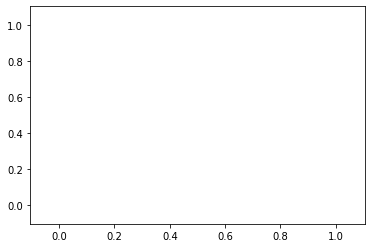

In [2]:
plt.plot(x)
plt.plot(y)
print(u_in)

[[ 0.     ]
 [ 0.     ]
 [ 0.     ]
 [30.     ]
 [20.     ]
 [10.     ]
 [ 0.     ]
 [ 0.     ]
 [ 0.     ]
 [ 0.     ]
 [ 0.     ]
 [ 0.     ]
 [18.10926]
 [ 0.     ]
 [ 0.     ]
 [ 0.     ]]


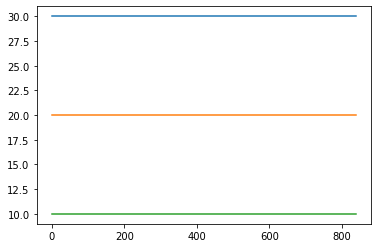

In [3]:
print(xoptSS)
u_in = xoptSS[12:16]
xm = xoptSS[0:12]
for i in range(0,6*140):
    Fk = F(x0=xm,p=vertcat(u_in,target))
    xm =  Fk['xf']
    x.append(xm[3])
    y.append(xm[4])
    z.append(xm[5])

plt.plot(x)
plt.plot(y)
plt.plot(z)

In [13]:
print(solver.stats()['return_status'] )


Solve_Succeeded


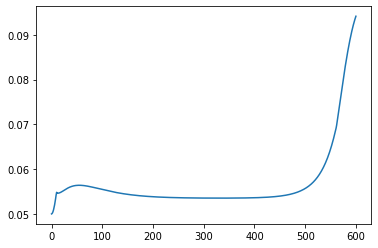

In [12]:

import numpy as np
import function_lib
from casadi import *
import matplotlib.pyplot as plt

param = {'k01':1.659e6,'k02':7.2177e8,'k03':2.6745e12,'B1':6666.7,'B2':8333.3,'B3':11111,'Vr':2108}
sys,F = plib.WilliamsOtto_casadi(param)

lbx = 0*np.ones((6,1))
ubx = 1*np.ones((6,1))
dx0 = 0*np.ones((6,1))

lbu = 0*np.ones((1,1))
ubu = 600*np.ones((1,1))
u0 = 0*np.ones((1,1))
par = {'lbx':lbx,'ubx':ubx,'dx0':dx0,'lbu':lbu,'ubu':ubu,'u0':u0}

OCP, trajectories = function_lib.buildNLP(sys,par,N=600,tf=15)

solver = OCP['solver']

xm = vertcat(0.4,0.4,0.05,0.05,0.05,0.05)
sol = solver(x0  = OCP['x0'],
             lbx = OCP['lbx'],
             ubx = OCP['ubx'],
             lbg = OCP['lbg'],
             ubg = OCP['ubg'],
             p = vertcat(xm,2,vertcat(1.3,333)))
    
assert solver.stats()['return_status']=='Solve_Succeeded', solver.stats()['return_status'] 
[wopt, uopt] = trajectories(sol['x'])
xopt = wopt[5,:].full().reshape(-1,1)
plt.plot(xopt)


In [3]:
print(5*inf)

inf
